In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
## Do you need this??
## output_data_file = "output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

In [3]:
# Adding OpenWeather API key to OpenWeather URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Creating empty lists to represent all of the different information needed to collect
city_name = []
lat = []
lng = []
max_temp = []
cloudiness = []
humidity = []
wind_speed = []
country = []
date = []

# Setting a variable to start counting. Will increase it in the For loop
num = 1

In [5]:
print("Beginning Data Retrival")
print("-----------------------")

# For loop to loop through the list of cities pulled from the previous For loop
for city in cities:  
    
    # Try statement to look to see if the city exists. If it does then it will append the spefic info to the corresponding list
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {num} | {city_record}")
        
        # Increasing counter
        num = num + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # Except part of the Try statement if the city does not exist
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrival
-----------------------
Processing Record 1 | Bilibino
Processing Record 2 | Cherskiy
Processing Record 3 | San Cristobal
Processing Record 4 | Tegul'det
Processing Record 5 | Dingli
Processing Record 6 | Ushuaia
Processing Record 7 | Busselton
Processing Record 8 | Castro
City not found. Skipping...
Processing Record 9 | Vila Velha
Processing Record 10 | East London
Processing Record 11 | Severo-Kuril'sk
Processing Record 12 | Saint-Pierre
Processing Record 13 | Lompoc
City not found. Skipping...
Processing Record 14 | Carnarvon
Processing Record 15 | Atuona
Processing Record 16 | Punta Arenas
Processing Record 17 | Grindavik
Processing Record 18 | Ponta do Sol
City not found. Skipping...
Processing Record 19 | Butaritari
Processing Record 20 | Sheltozero
Processing Record 21 | Albany
Processing Record 22 | Irbeyskoye
Processing Record 23 | Rawson
Processing Record 24 | Puerto Ayora
Processing Record 25 | Jinchang
Processing Record 26 | Saint-Philippe
Processin

Processing Record 229 | Sioux Lookout
City not found. Skipping...
Processing Record 230 | Fortuna
Processing Record 231 | Port Moresby
Processing Record 232 | Nantucket
Processing Record 233 | Goth Phulji
Processing Record 234 | Tilichiki
Processing Record 235 | Cabedelo
Processing Record 236 | Ternovskaya
Processing Record 237 | Phonhong
Processing Record 238 | Akhnūr
Processing Record 239 | Pittsburg
Processing Record 240 | Faya
Processing Record 241 | Bathsheba
Processing Record 242 | Constitución
Processing Record 243 | Maceió
Processing Record 244 | Biltine
Processing Record 245 | Sur
Processing Record 246 | Khani
Processing Record 247 | Yomou
Processing Record 248 | Kaka
Processing Record 249 | Hamilton
City not found. Skipping...
Processing Record 250 | Tateyama
Processing Record 251 | Sterling
Processing Record 252 | Nanortalik
Processing Record 253 | Aban
Processing Record 254 | Lavrentiya
Processing Record 255 | Agüimes
Processing Record 256 | Padang
Processing Record 257 | G

Processing Record 459 | Kŭlob
Processing Record 460 | Lima
Processing Record 461 | Fort Nelson
Processing Record 462 | Imbituba
Processing Record 463 | Ancud
Processing Record 464 | Calabozo
Processing Record 465 | Kualakapuas
City not found. Skipping...
Processing Record 466 | Kattivākkam
Processing Record 467 | Ust'-Kut
Processing Record 468 | Montluçon
Processing Record 469 | Republic
Processing Record 470 | Gamboula
Processing Record 471 | New Ulm
Processing Record 472 | Mbala
Processing Record 473 | Copperas Cove
Processing Record 474 | Pouébo
Processing Record 475 | Newport
Processing Record 476 | Muros
Processing Record 477 | Moroto
City not found. Skipping...
Processing Record 478 | Carutapera
Processing Record 479 | Kendari
Processing Record 480 | Florián
Processing Record 481 | Marystown
Processing Record 482 | Tessalit
Processing Record 483 | Tarko-Sale
City not found. Skipping...
Processing Record 484 | Paamiut
Processing Record 485 | Mercedes
Processing Record 486 | Casabl

In [6]:
# Saving information in to dictionary 
weather_info = {"City": city_name,
               "Latitude": lat,
               "Longitude": lng,
               "Max Temp": max_temp,
               "Humidity": cloudiness,
               "Cloudiness": humidity,
               "Wind Speed": wind_speed,
               "Country": country,
               "Date": date}

# Using pandas to convert dictionary into DataFrame
weather_df = pd.DataFrame(weather_info)
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bilibino,68.05,166.44,-30.48,99,81,2.93,RU,1609813374
1,Cherskiy,68.75,161.30,-31.34,78,84,5.26,RU,1609813375
2,San Cristobal,7.77,-72.22,63.19,45,92,2.37,VE,1609813376
3,Tegul'det,57.31,88.17,-24.34,0,86,3.27,RU,1609813378
4,Dingli,35.86,14.38,52.00,20,61,6.93,MT,1609813379
...,...,...,...,...,...,...,...,...,...
556,Tuy Hoa,13.08,109.30,75.49,76,90,13.82,VN,1609813994
557,Tamworth,52.63,-1.70,35.60,90,80,10.29,GB,1609813815
558,Lixouri,38.20,20.43,54.10,23,66,9.15,GR,1609813996
559,Alcañiz,41.05,-0.13,30.99,10,73,11.99,ES,1609813997


In [43]:
# Display count of weather data values 
## weather_data.count()

# Save data frame to CSV
weather_df.to_csv("../VacationPy/WeatherData.csv")
weather_df.to_csv("OutputData/WeatherData.csv")

In [12]:
# Producing data analysis of DataFrame
weather_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,21.264296,20.727415,48.768556,55.491979,77.087344,7.779091,1.609814e+09
std,32.738012,92.196620,31.980568,39.546767,16.860071,5.920201,1.909087e+02
min,-54.800000,-175.200000,-45.630000,0.000000,20.000000,0.290000,1.609813e+09
25%,-6.980000,-60.770000,32.000000,10.000000,69.000000,3.360000,1.609814e+09
50%,26.100000,24.730000,58.930000,74.000000,81.000000,6.110000,1.609814e+09
75%,48.650000,102.280000,73.530000,94.000000,89.000000,10.920000,1.609814e+09
max,78.220000,179.320000,95.380000,100.000000,100.000000,43.620000,1.609814e+09


In [13]:
# Creating a new DataFram that only contains cities with Humidity greater than or equal to 100
high_humidity_df = weather_df.loc[weather_df["Humidity"] <= 100]
high_humidity_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bilibino,68.05,166.44,-30.48,99,81,2.93,RU,1609813374
1,Cherskiy,68.75,161.30,-31.34,78,84,5.26,RU,1609813375
2,San Cristobal,7.77,-72.22,63.19,45,92,2.37,VE,1609813376
3,Tegul'det,57.31,88.17,-24.34,0,86,3.27,RU,1609813378
4,Dingli,35.86,14.38,52.00,20,61,6.93,MT,1609813379
...,...,...,...,...,...,...,...,...,...
556,Tuy Hoa,13.08,109.30,75.49,76,90,13.82,VN,1609813994
557,Tamworth,52.63,-1.70,35.60,90,80,10.29,GB,1609813815
558,Lixouri,38.20,20.43,54.10,23,66,9.15,GR,1609813996
559,Alcañiz,41.05,-0.13,30.99,10,73,11.99,ES,1609813997


In [14]:
high_humidity_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,561.000000,561.000000,561.000000,561.000000,561.000000,561.000000,5.610000e+02
mean,21.264296,20.727415,48.768556,55.491979,77.087344,7.779091,1.609814e+09
std,32.738012,92.196620,31.980568,39.546767,16.860071,5.920201,1.909087e+02
min,-54.800000,-175.200000,-45.630000,0.000000,20.000000,0.290000,1.609813e+09
25%,-6.980000,-60.770000,32.000000,10.000000,69.000000,3.360000,1.609814e+09
50%,26.100000,24.730000,58.930000,74.000000,81.000000,6.110000,1.609814e+09
75%,48.650000,102.280000,73.530000,94.000000,89.000000,10.920000,1.609814e+09
max,78.220000,179.320000,95.380000,100.000000,100.000000,43.620000,1.609814e+09


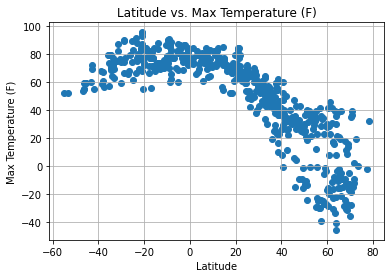

In [42]:
plt.scatter(lat, max_temp)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs. Max Temperature (F)")
plt.grid(True)

plt.savefig("OutputData/Latitude_vs_Max_Temp.png")
plt.show()

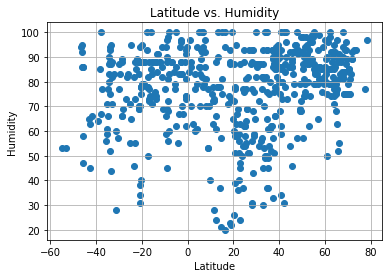

In [44]:
plt.scatter(lat, humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.grid(True)

plt.savefig("OutputData/Latitude_vs_Humidity.png")
plt.show()

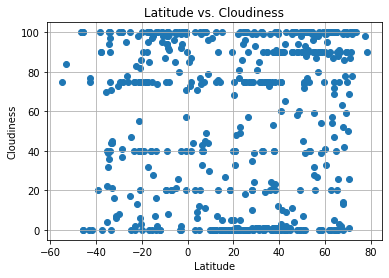

In [45]:
plt.scatter(lat, cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.grid(True)

plt.savefig("OutputData/Latitude_vs_Cloudiness.png")
plt.show()

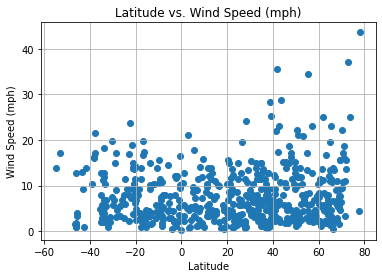

In [46]:
plt.scatter(lat, wind_speed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed (mph)")
plt.grid(True)

plt.savefig("OutputData/Latitude_vs_WindSpeed.png")
plt.show()

In [19]:
north_hem_df = weather_df.loc[weather_df["Latitude"] >= 0]
north_hem_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bilibino,68.05,166.44,-30.48,99,81,2.93,RU,1609813374
1,Cherskiy,68.75,161.30,-31.34,78,84,5.26,RU,1609813375
2,San Cristobal,7.77,-72.22,63.19,45,92,2.37,VE,1609813376
3,Tegul'det,57.31,88.17,-24.34,0,86,3.27,RU,1609813378
4,Dingli,35.86,14.38,52.00,20,61,6.93,MT,1609813379


In [20]:
south_hem_df = weather_df.loc[weather_df["Latitude"] < 0]
south_hem_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,Ushuaia,-54.80,-68.30,51.80,75,53,13.87,AR,1609813380
6,Busselton,-33.65,115.33,77.00,0,44,5.01,AU,1609813381
7,Castro,-24.79,-50.01,61.29,47,95,5.88,BR,1609813382
8,Vila Velha,-20.33,-40.29,77.00,40,88,11.41,BR,1609813210
9,East London,-33.02,27.91,74.77,45,71,5.53,ZA,1609813384


The r-squared is: 0.7169097703792601


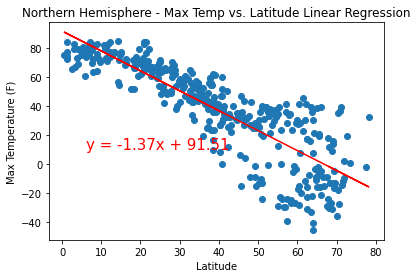

In [30]:
x_values = north_hem_df["Latitude"]
y_values = north_hem_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.24327615024670693


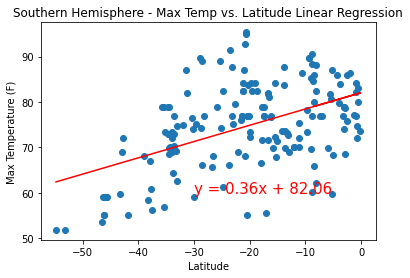

In [32]:
x_values = south_hem_df["Latitude"]
y_values = south_hem_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0723798068993985


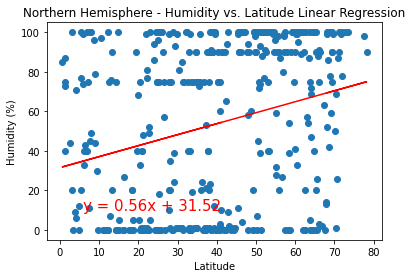

In [23]:
x_values = north_hem_df["Latitude"]
y_values = north_hem_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0085758525822233


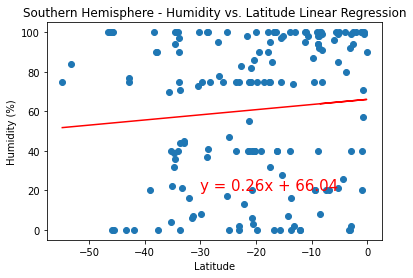

In [35]:
x_values = south_hem_df["Latitude"]
y_values = south_hem_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.08200895364924328


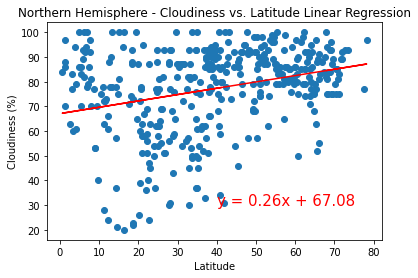

In [37]:
x_values = north_hem_df["Latitude"]
y_values = north_hem_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.04210170109830116


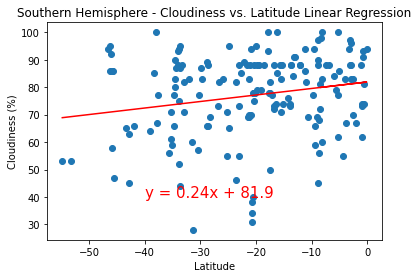

In [38]:
x_values = south_hem_df["Latitude"]
y_values = south_hem_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.03236887249089052


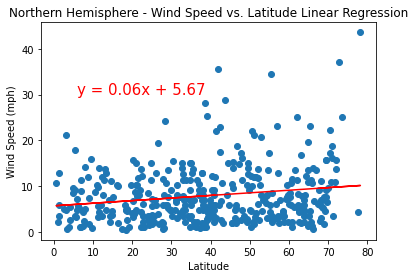

In [39]:
x_values = north_hem_df["Latitude"]
y_values = north_hem_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.019274620827208284


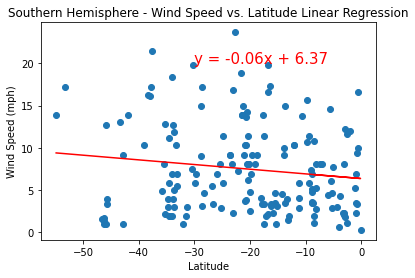

In [41]:
x_values = south_hem_df["Latitude"]
y_values = south_hem_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
print(f"The r-squared is: {rvalue**2}")
plt.show()

Observations
- There is a strong correlation between the max temperature and the value of the latitude where the closer the latitude is to 0 the higher the max temperature.
- There does not seem to be much of a change in wind speeds based on the latitude of a city.
- Cloudiness looks to be fairly evenly distributed across different latitude values. 